In [244]:
import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

%matplotlib inline

In [245]:
pd.set_option('display.max_rows', 20)
plt.style.use('fivethirtyeight')

In [246]:

import pandas as pd

def get_data(targetdir):
    #list the files
    filelist = os.listdir(targetdir) 
    #read them into pandas
    df_list = [pd.read_csv(targetdir + file) for file in filelist if file[-4:] == '.csv']
    #concatenate them together
    big_df = pd.concat(df_list)
    return big_df

In [247]:
data_df = get_data('../data/datacanvas/')

In [248]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9952 entries, 0 to 122
Data columns (total 11 columns):
airquality_raw    9952 non-null float64
city              9952 non-null object
dust              9952 non-null float64
humidity          9952 non-null float64
light             9952 non-null float64
sensor_id         9952 non-null object
sensor_name       9952 non-null object
sound             9952 non-null float64
source            9952 non-null object
temperature       9952 non-null float64
timestamp         9952 non-null object
dtypes: float64(6), object(5)
memory usage: 933.0+ KB


In [249]:
data_df['noise_db'] = data_df.sound.map(lambda x: 0.0158 * x + 49.184)

In [250]:
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])

In [251]:
data_df.groupby(['city', 'sensor_name']).dust.sum()

city       sensor_name  
Bangalore  Claptrap         877629.082182
           DataBrigade      201257.027019
           Geekstorm        243745.043239
           MODseeed         173690.910913
           Nextdrop          60621.385003
           Palantir         297310.738917
           WRI              226013.804859
           openbangalore    166801.202482
...
Singapore  SECSensor                 170912.058745
           The ThunderBolt           379366.987949
           ghimmohyandao              66289.123182
           mm@alexandra              130524.819049
           reversehaven              316540.106357
           rpbaltazar@bukit-timah    138769.624274
           sg_hougang_61              84419.187569
           swissnexSG                 92633.841789
Name: dust, Length: 80, dtype: float64

In [252]:
data_df.set_index('timestamp', inplace=True)

In [253]:
def plot_sensors(df, city='San Francisco', metric_name='noise_db'):
    fig, ax = plt.subplots(14, 1, sharey=True, figsize=(10, 25))
    df = df[df.city == city]
    for idx, sensor_name in enumerate(list(df.sensor_name.unique())):
        df[df.sensor_name == sensor_name].ix[:, metric_name].plot(ax=ax.flat[idx])
        ax.flat[idx].set_title(sensor_name + ' ' + metric_name)

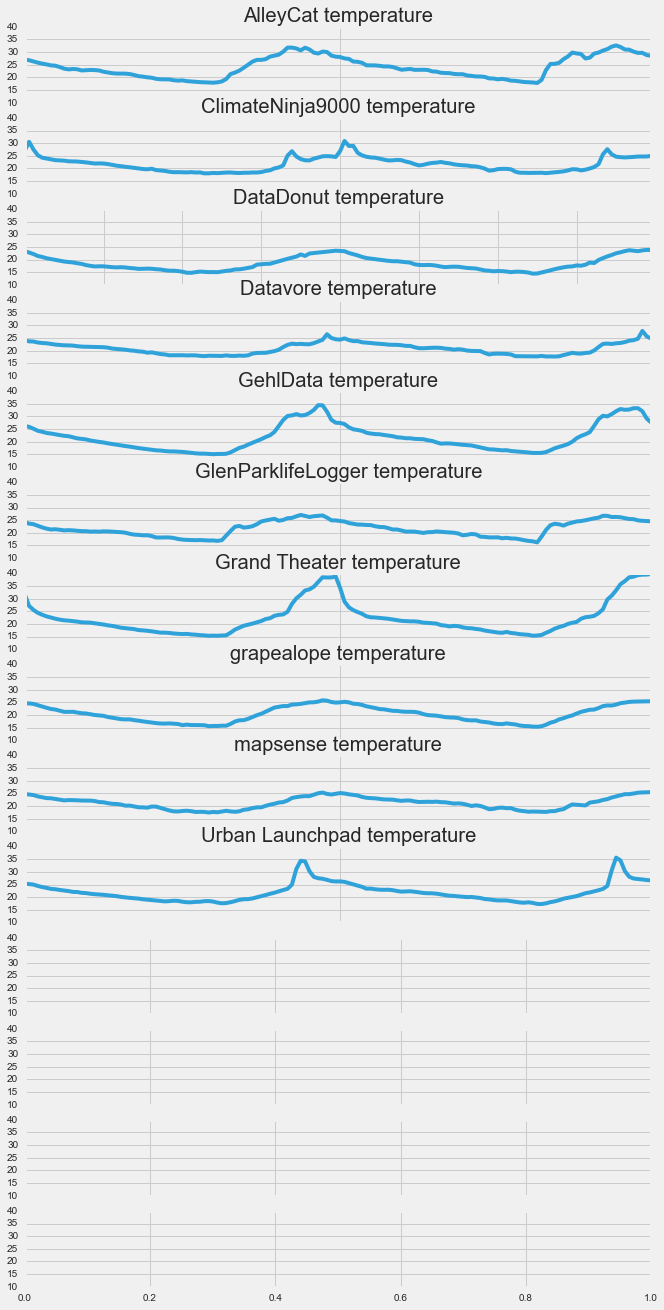

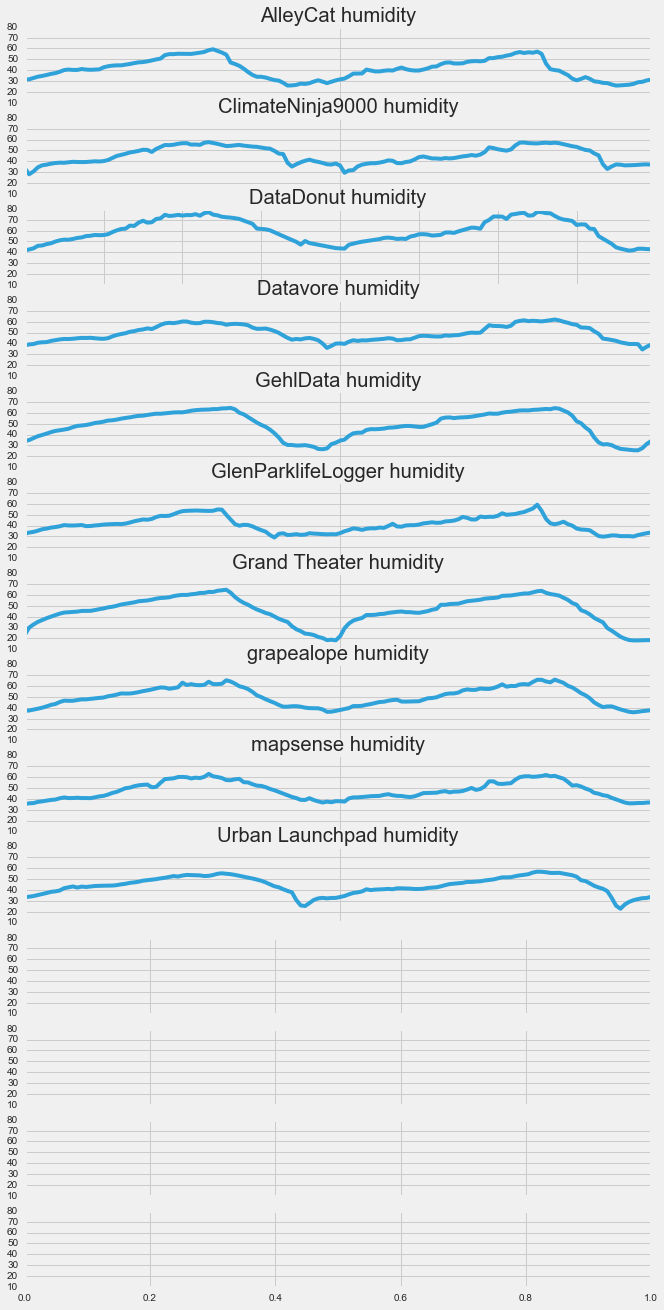

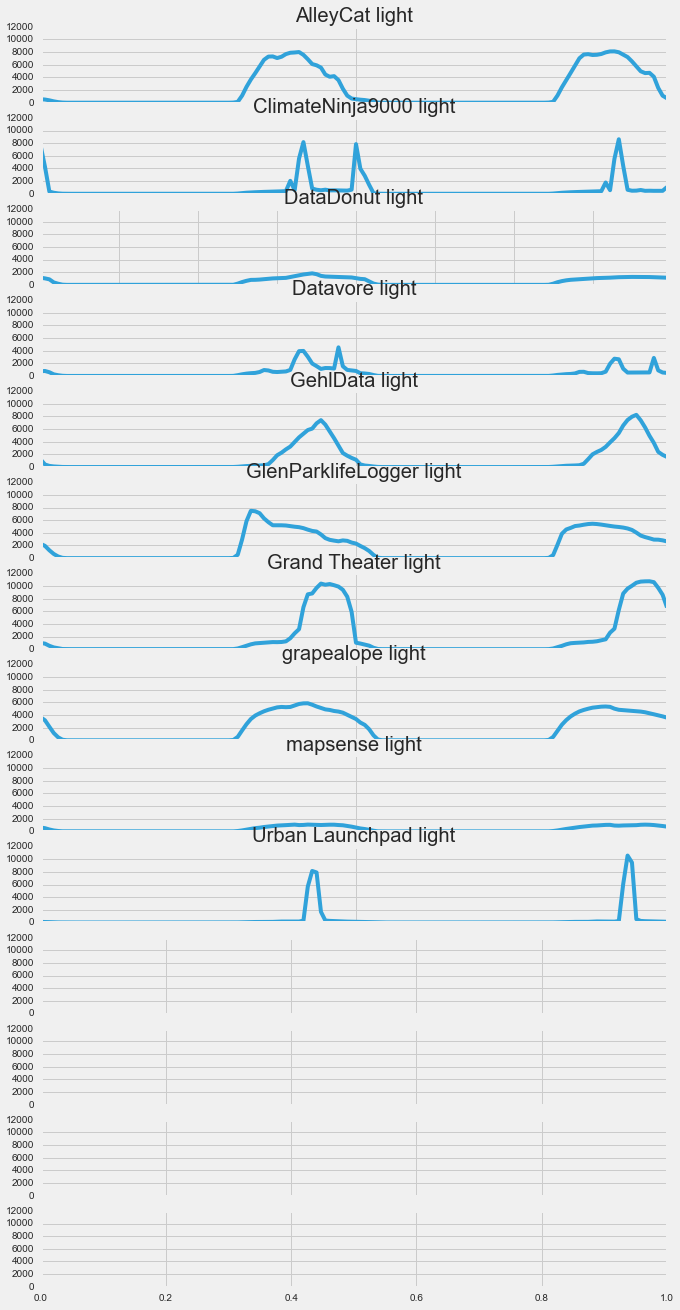

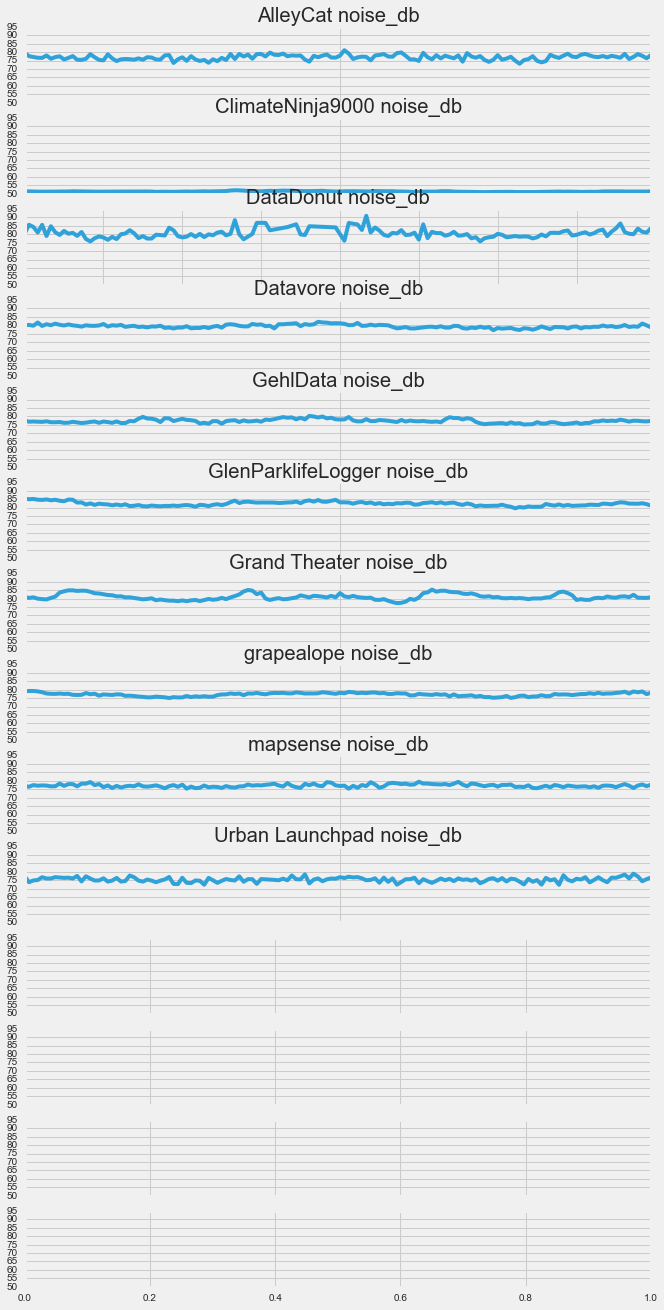

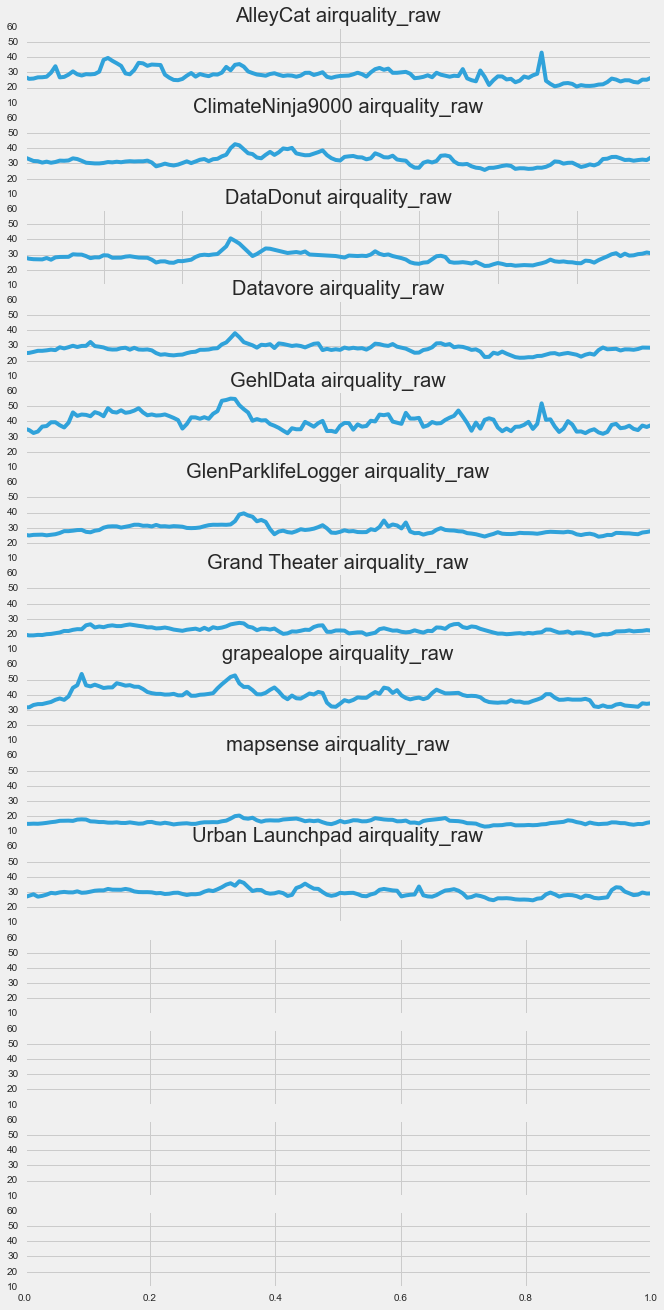

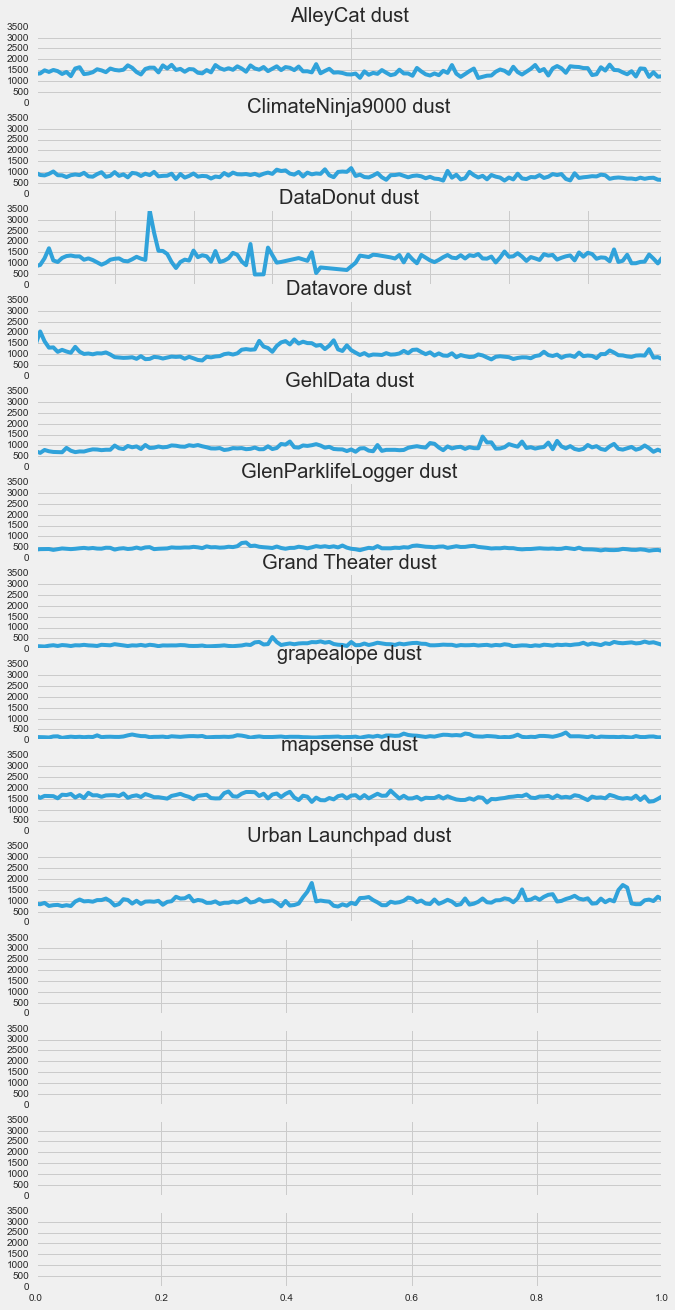

In [254]:
# temperature, humidity, light, airquality_raw, sound,dust 
def plot_by_city(city):
    plot_sensors(data_df, city, 'temperature')
    plot_sensors(data_df, city, 'humidity')
    plot_sensors(data_df, city, 'light')
    plot_sensors(data_df, city, 'noise_db')
    plot_sensors(data_df, city, 'airquality_raw')
    plot_sensors(data_df, city, 'dust')
    
plot_by_city('San Francisco')

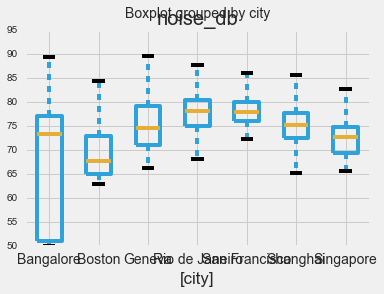

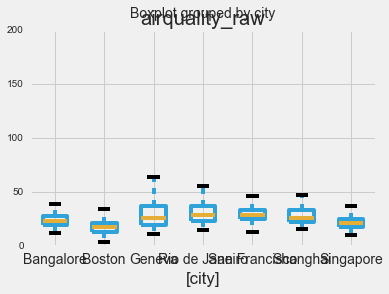

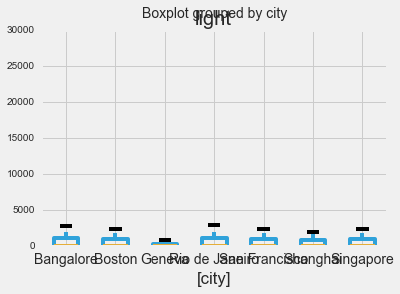

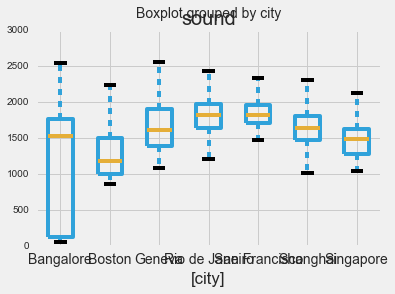

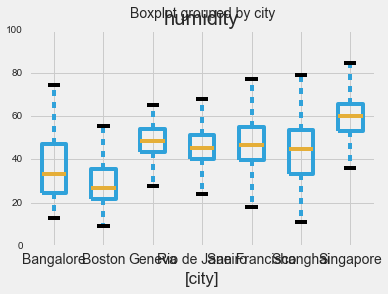

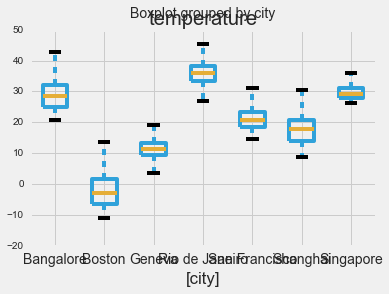

In [260]:
#fig, ax = plt.subplots(4, 2, sharey=True, figsize=(15, 10))
#for idx, city in enumerate(['San Francisco', 'Bangalore', 'Boston', 'Geneva', 'Rio de Janeiro', 'Shanghai', 'Singapore']):
#    data_df[data_df.city == city].ix[:, 'noise_db'].plot(ax=ax.flat[idx])
#    ax.flat[idx].set_title(city)

data_df[['noise_db', 'city']].boxplot(by='city')
data_df[['airquality_raw', 'city']].boxplot(by='city')
data_df[['light', 'city']].boxplot(by='city')
data_df[['sound', 'city']].boxplot(by='city')
data_df[['humidity', 'city']].boxplot(by='city')
data_df[['temperature', 'city']].boxplot(by='city')